# Hot Canon Ball (Steady State Solve)

In [1]:
import UWGeodynamics as GEO
import glucifer

loaded rc file /workspace/user_data/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

In [3]:
velocity = 1.0 * u.centimeter / u.hour
model_length = 2. * u.meter
model_height = 1. * u.meter
minTemp = 300. * u.degK
maxTemp = 1000. * u.degK
bodyforce = 200 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_height
Kt = KL / velocity
KM = bodyforce * KL**2 * Kt**2
KT = maxTemp - minTemp

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM
GEO.scaling_coefficients["[temperature]"] = KT

In [4]:
Model = GEO.Model(elementRes=(128, 128), 
                  minCoord=(-1. * u.meter, -50. * u.centimeter), 
                  maxCoord=(1. * u.meter, 50. * u.centimeter))

In [5]:
Model.diffusivity = 1e-6 * u.metre**2 / u.second 
Model.capacity    = 1000. * u.joule / (u.kelvin * u.kilogram)

In [6]:
Disk = GEO.shapes.Disk(center=(0.,0.), radius=30. * u.centimetre)

Background = Model.add_material(name="BackGround", shape=GEO.shapes.Layer2D(top=Model.top, bottom=Model.bottom))
CanonBall  = Model.add_material(name="CanonBall", shape=Disk)

In [7]:
mask = Disk.fn.evaluate(Model.mesh.data)
nodes = Model.mesh.data_nodegId[mask].ravel()

In [8]:
Model.set_temperatureBCs(top=maxTemp, bottom=minTemp, nodeSets=[(nodes, maxTemp)])

In [9]:
Model.init_model()


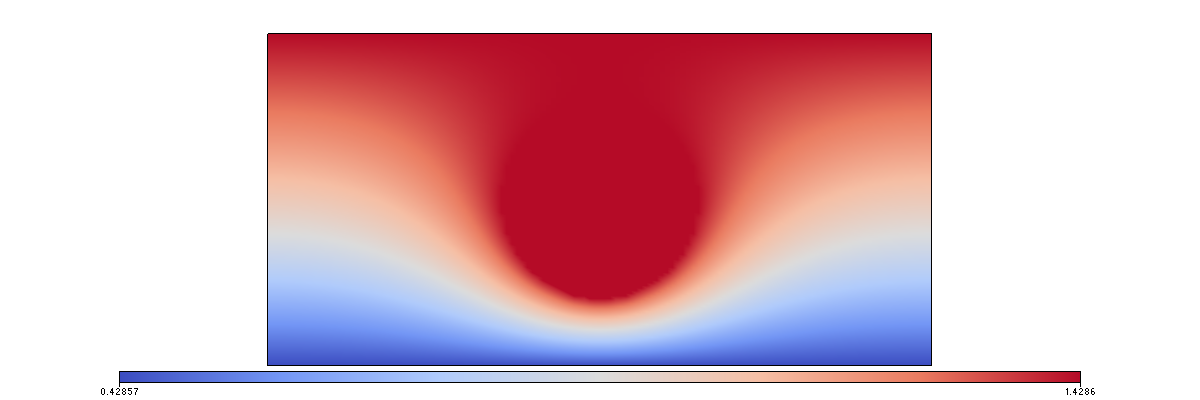

In [10]:
Fig = glucifer.Figure(figsize=(1200,400))
Fig.Surface(Model.mesh, Model.temperature, colours="coolwarm")
Fig.show()